In [42]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
%matplotlib inline

# Setup Functions

In [43]:
# THIS WORKS!
# Implementation of https://en.wikipedia.org/wiki/Ordered_dithering
# https://gist.github.com/MehdiNS/bd41bbc6db780c9409157d35d331ac80
# https://github.com/mies47/MM-ordered_dithering/blob/master/main.py
def dither_matrix(n:int):
    if n == 1:
        return np.array([[0]])
    else:
        first = (n ** 2) * dither_matrix(int(n/2))
        second = (n ** 2) * dither_matrix(int(n/2)) + 2
        third = (n ** 2) * dither_matrix(int(n/2)) + 3
        fourth = (n ** 2) * dither_matrix(int(n/2)) + 1
        first_col = np.concatenate((first, third), axis=0)
        second_col = np.concatenate((second, fourth), axis=0)
        return (1/n**2) * np.concatenate((first_col, second_col), axis=1)

In [44]:
def ordered_dithering(img_pixel:np.array, dither_m:np.array):
    n = np.size(dither_m, axis=0)
    img_dithr = np.zeros_like(img_pixel, dtype=int)
    x_max = np.size(img_pixel, axis=1)
    y_max = np.size(img_pixel, axis=0)
    for x in range(x_max):
        for y in range(y_max):
            i = x % n
            j = y % n
            if img_pixel[y][x] > dither_m[i][j]:
                img_dithr[y][x] = 255
            else:
                img_dithr[y][x] = 0
    return img_dithr

## Setup Example

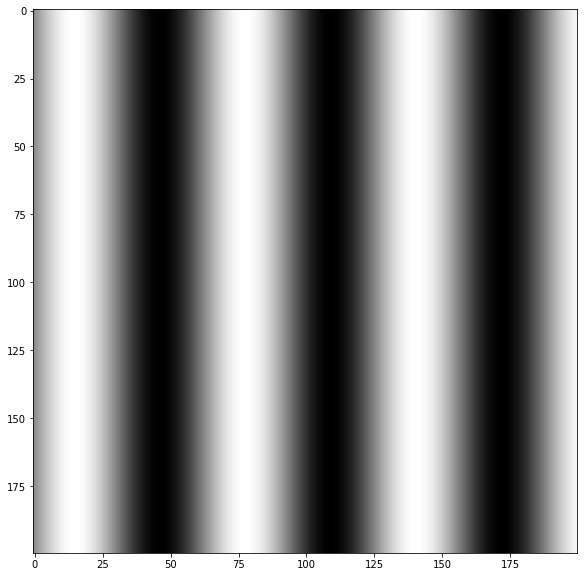

In [45]:
# X is side to side, 0 left
# Y is up/down, 0 top
xlen = 200
ylen = 200
#
x = np.arange(1,xlen+1,1)
y = (256*x**2/xlen**2)
#y = 256*((200**2-(200-x)**2)/200**2)
y = np.sin(x/10)*256
y = y.astype(int)
z = np.tile(y,ylen)
base_arr = z.reshape(ylen,xlen)
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.imshow(base_arr, cmap='gray')

In [46]:
bas_img = im.fromarray(base_arr)
bas_img.show()
rot_img = bas_img.rotate(90)
rot_img.show()


In [47]:
rot_arr = np.array(rot_img)
dm = dither_matrix(8)
#dm = np.flip(dm)
#dm = np.rot90(dm)
rot_dit = ordered_dithering(rot_arr/256.0,dm)

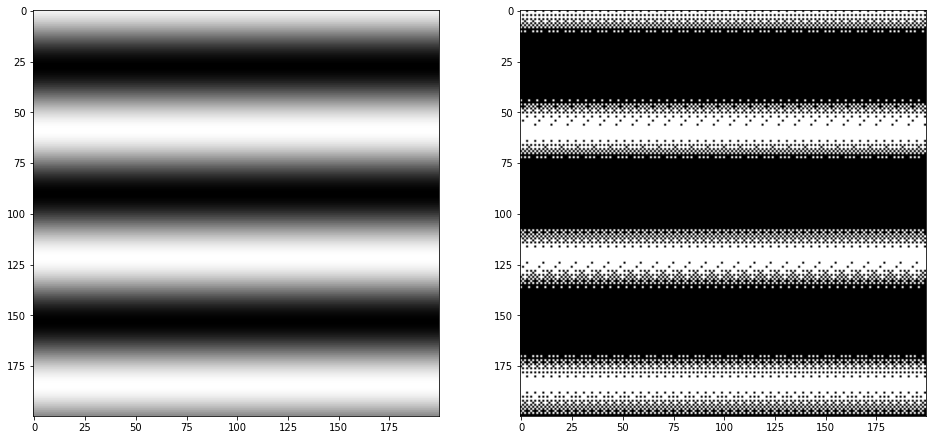

In [48]:
fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax_list[0].imshow(rot_arr, cmap='gray')
ax_list[1].imshow(rot_dit, cmap='gray')
#ax_list[1].plot((0,100),(100,100),'ro')

In [49]:
# Define line that starts the data with some geom.
istart= int(200-np.cos(np.pi*45/180)*200)
istart
diag = [[], []]
x=0
for i in range(istart,-1,-1):
    y = i
    diag[0].append(x)
    diag[1].append(y)
    x+=1

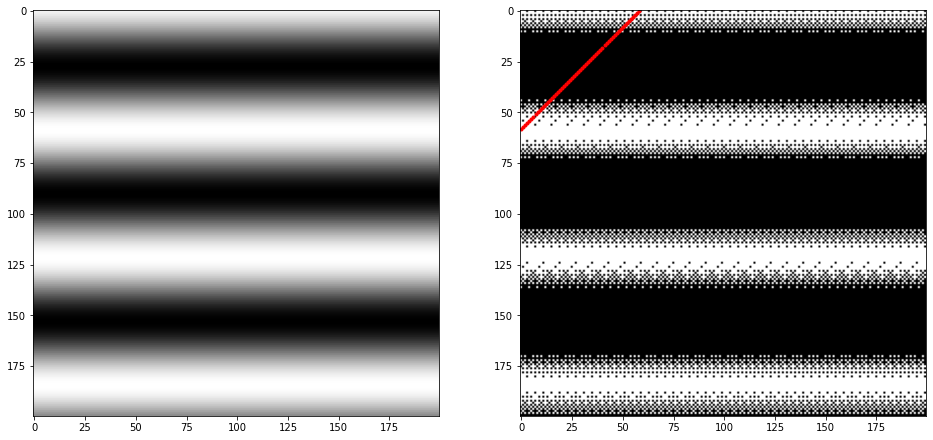

In [50]:
fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax_list[0].imshow(rot_arr, cmap='gray')
ax_list[1].imshow(rot_dit, cmap='gray')
ax_list[1].plot(diag[0],diag[1],'r.')

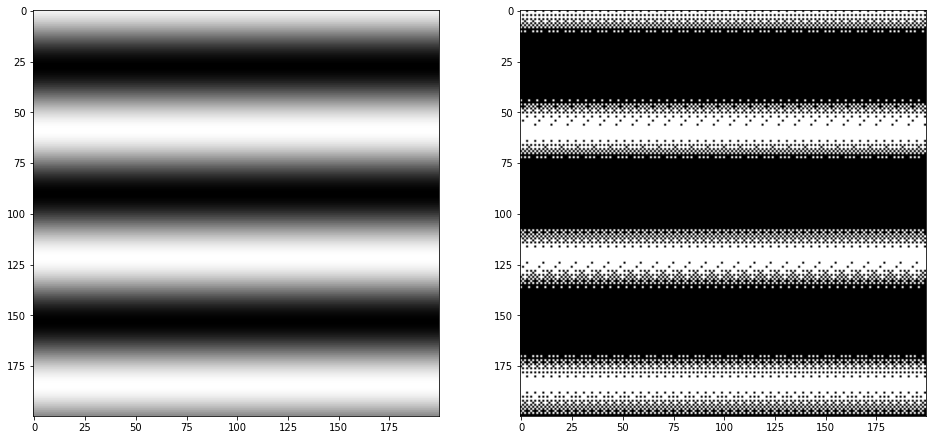

In [52]:
lowx = [199-i for i in diag[0]]
lowy = [199-i for i in diag[1]]
lowx.reverse()
lowy.reverse()
fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax_list[0].imshow(rot_arr, cmap='gray')
ax_list[1].imshow(rot_dit, cmap='gray')
#ax_list[1].plot(diag[0],diag[1],'r.')
#ax_list[1].plot(lowx,lowy,'r.')

## Bright to Dark to Bright

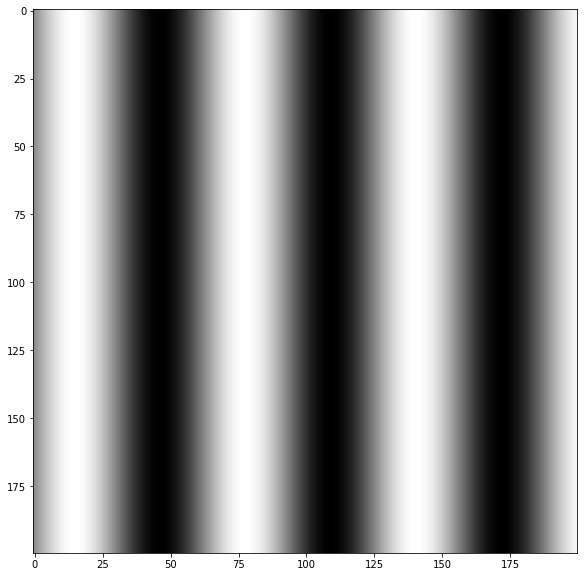

In [53]:
# X is side to side, 0 left
# Y is up/down, 0 top
xlen = 200
ylen = 200
#
x = np.arange(1,xlen+1,1)
#y = (abs(100-x))*256
#y = (xlen/2-x)**2/(xlen/2)**2*256
y = np.sin(x/10)*256
y = y.astype(int)
z = np.tile(y,ylen)
base_arr = z.reshape(ylen,xlen)
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.imshow(base_arr, cmap='gray')

In [54]:
# 45 deg rotation test.
x_diag_start= int(xlen-np.cos(np.pi*45/180)*xlen)
xdiag = range(x_diag_start,-1,-1)
ydiag = range(0,len(xdiag),1)
#
xdiag_opp = range(xlen-x_diag_start-1,xlen,1)
ydiag_opp = range(xlen-1,xlen-x_diag_start-2,-1)
#
xlen*np.sqrt(2)

282.842712474619

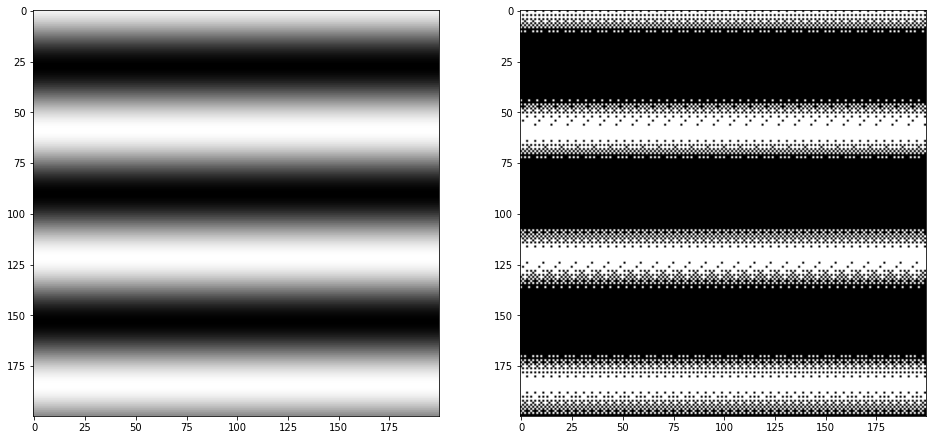

In [56]:
bas_img = im.fromarray(base_arr)
rot_img = bas_img.rotate(90)
rot_arr = np.array(rot_img)
dm = dither_matrix(8)
#dm = np.flip(dm)
#dm = np.rot90(dm)
rot_dit = ordered_dithering(rot_arr/256.0,dm)
fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax_list[0].imshow(rot_arr, cmap='gray')
ax_list[1].imshow(rot_dit, cmap='gray')
#ax_list[1].plot(xdiag,ydiag,'r.')
#ax_list[1].plot(xdiag_opp,ydiag_opp,'r.')